In [1]:
"""Simple Linear Regression Algorithm"""

'Simple Linear Regression Algorithm'

In [2]:
import numpy as np
from sklearn.datasets import fetch_california_housing
# import matplotlib.pyplot as plt

In [3]:
# Load the dataset
housing = fetch_california_housing(as_frame=True)
df = housing.frame

# Check the first few rows
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [4]:
# Independent Feature and Dependent Feature 
X = df.drop(columns=["MedHouseVal"])
y = df["MedHouseVal"]

In [5]:
# train test split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [6]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7061,4.1312,35.0,5.882353,0.975490,1218.0,2.985294,33.93,-118.02
14689,2.8631,20.0,4.401210,1.076613,999.0,2.014113,32.79,-117.09
17323,4.2026,24.0,5.617544,0.989474,731.0,2.564912,34.59,-120.14
10056,3.1094,14.0,5.869565,1.094203,302.0,2.188406,39.26,-121.00
15750,3.3068,52.0,4.801205,1.066265,1526.0,2.298193,37.77,-122.45
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [7]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()


In [8]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
from sklearn.linear_model import LinearRegression # type: ignore
from sklearn.model_selection import cross_val_score # type: ignore

regression = LinearRegression()
regression.fit(X_train,y_train)

mse = cross_val_score(regression,X_train,y_train,scoring="neg_mean_squared_error",cv=5)

np.mean(mse)

-0.5268253746355749

In [10]:
# prediction
reg_pred = regression.predict(X_test)

In [11]:
reg_pred

array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133])

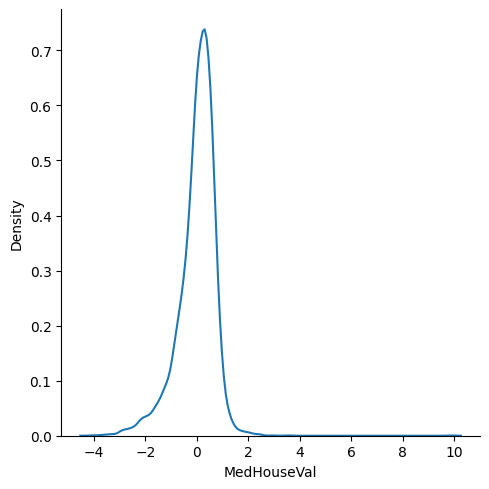

In [12]:
import seaborn as sns # type: ignore
sns.displot(reg_pred-y_test,kind="kde")

In [1]:
"""Ridge Regerssion Algorithm"""

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge_regression = Ridge()

parameters = {"alpha":[1,7,9,5,12,10,30,20,50,60,70,60,90]}

ridgeCV = GridSearchCV(ridge_regression,parameters,scoring="neg_mean_squared_error",cv=5)
ridgeCV.fit(X_train,y_train)

NameError: name 'X_train' is not defined

In [15]:
print(ridgeCV.best_params_)

{'alpha': 7}


In [16]:
print(ridgeCV.best_score_)

-0.5268176170997518


In [18]:
ridge_test = ridgeCV.predict(X_test)

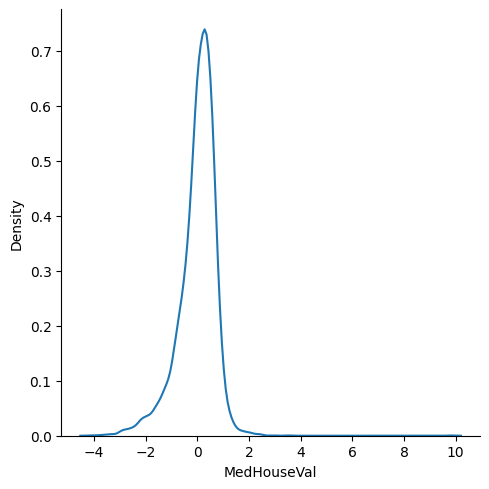

In [20]:
import seaborn as sns
sns.displot(ridge_test-y_test,kind="kde")